In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')
from modules.data_import import *
from modules.basics import *

In [2]:
run_name = '11-24-2021'

# Train classifier

### Data

In [3]:
PATH = Path('../../../MC')

In [4]:
train_fy = FoldYielder(PATH/'train_0.hdf5', input_pipe=PATH/'input_pipe_0.pkl')

### Training

In [5]:
bs = 1024
objective = 'classification'
cat_embedder = CatEmbedder.from_fy(train_fy)
# width=len(train_fy.cont_feats)+np.sum(cat_embedder.emb_szs)

# body = partial(FullyConnected, act='swish',width=width,depth=6,dense=True, do=0.05)
body = partial(FullyConnected, act='swish',width=25,depth=3,dense=True, do=0)
opt_args = {'opt':'adam', 'eps':1e-08}

n_out = 1
model_builder = ModelBuilder(objective, cont_feats=train_fy.cont_feats, n_out=n_out, cat_embedder=cat_embedder,
                             body=body, opt_args=opt_args)
Model(model_builder)

Inputs:
22 Continuous: ['Higgsbb_cand_pt', 'Zjet_cand_pt', 'leading_Hbb_pt', 'trailing_Hbb_pt', 'leading_jet_pt', 'trailing_jet_pt', 'Higgsbb_cand_mass', 'HiggsZZ_cand_mass', 'Zlep_cand_mass', 'Zjet_cand_mass', 'Zlep_cand_pt', 'dR_l1j1', 'dR_l1j2', 'dR_l1b1', 'dR_l1b2', 'dR_l2j1', 'dR_l2j2', 'dR_l2b1', 'dR_l2b2', 'dR_j1j2', 'dR_b1b2', 'res_mass']
                   
0  Categorical: []
                   
0  Matrix elements: []
                   

Model:
<bound method Module.parameters of Sequential(
  (0): CatEmbHead()
  (1): FullyConnected(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=22, out_features=25, bias=True)
        (1): Swish()
      )
      (1): Sequential(
        (0): Linear(in_features=47, out_features=25, bias=True)
        (1): Swish()
      )
      (2): Sequential(
        (0): Linear(in_features=72, out_features=25, bias=True)
        (1): Swish()
      )
    )
  )
  (2): ClassRegMulti(
    (dense): Linear(in_features=25, out_featu

LR finder took 8.861s 


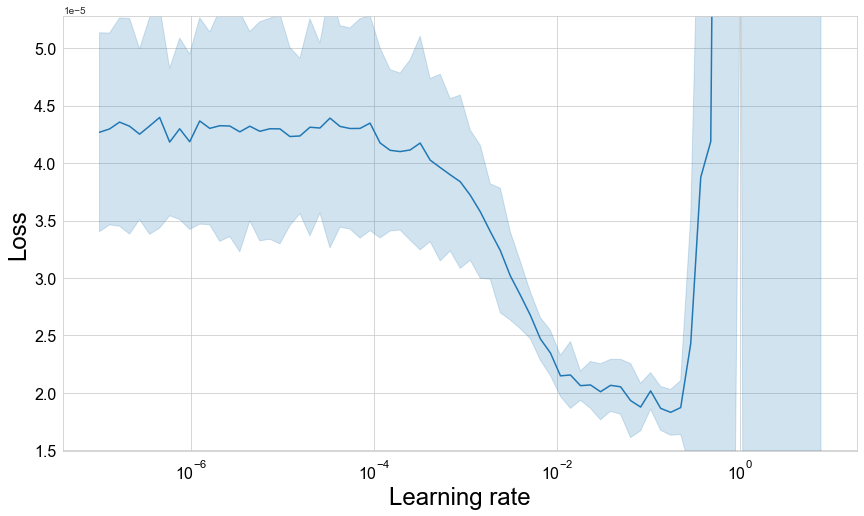

In [6]:
lr_finder = fold_lr_find(train_fy, model_builder, bs, lr_bounds=[1e-7,1e1])

In [7]:
n_models = 10
patience = 5
n_epochs = 15

cb_partials = [partial(OneCycle, lengths=(45, 90), lr_range=[1e-3, 1e-2], mom_range=(0.85, 0.95), interp='cosine')]
metric_partials = [partial(AMS, n_total=250000, br=10, wgt_name='gen_orig_weight', main_metric=False)]

Training model 1 / 10, Valid Index = 0, Train indices= [1, 2, 3, 4, 5, 6, 7, 8, 9]


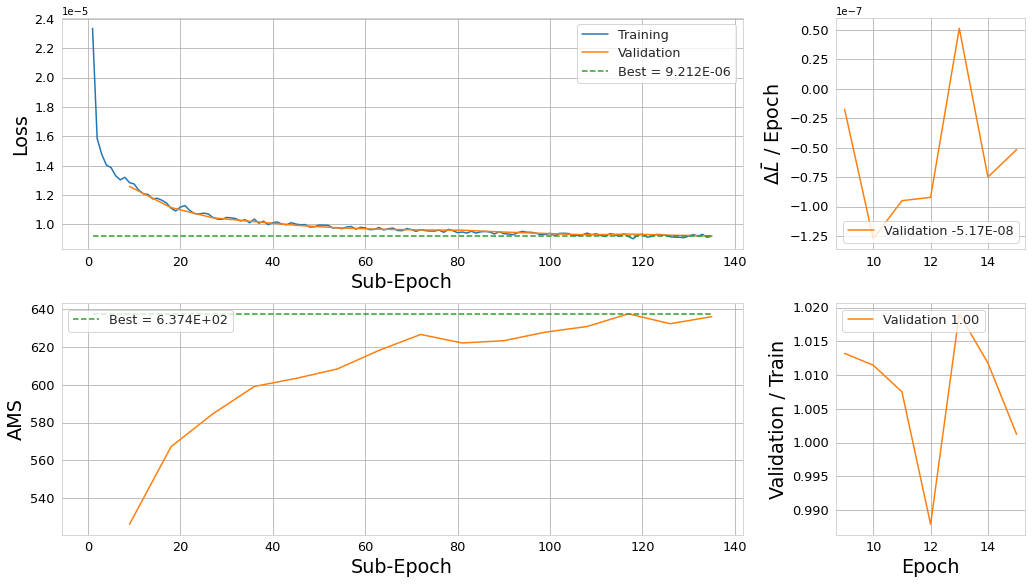

Loading best model with metric value 9.212E-06
Model took 247.976s

Scores are: {'loss': 9.211663382302504e-06, 'AMS': 635.8813183564114}
Training model 2 / 10, Valid Index = 1, Train indices= [0, 2, 3, 4, 5, 6, 7, 8, 9]


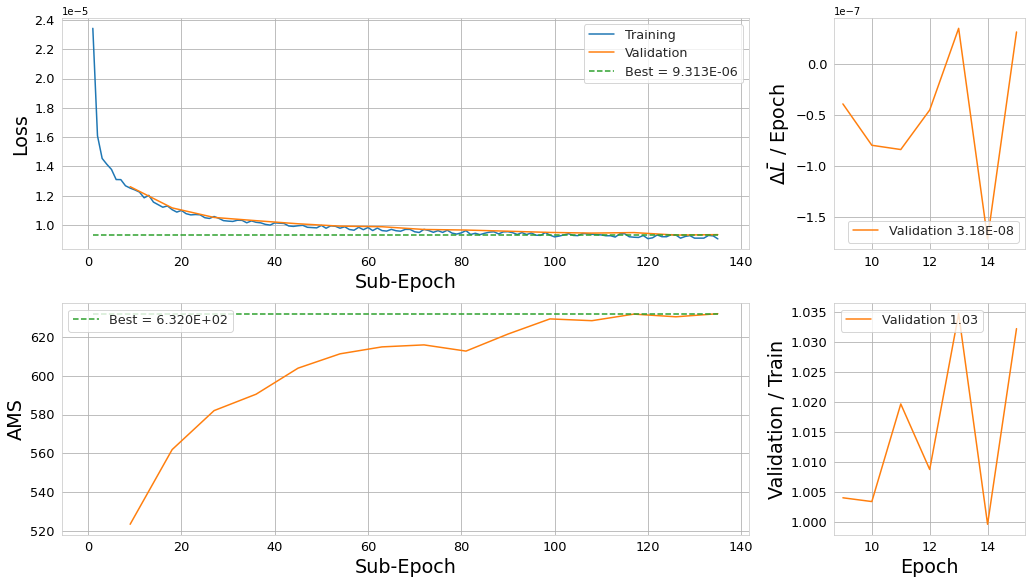

Loading best model with metric value 9.313E-06
Model took 249.577s

Scores are: {'loss': 9.313328519056085e-06, 'AMS': 630.411099114322}
Training model 3 / 10, Valid Index = 2, Train indices= [0, 1, 3, 4, 5, 6, 7, 8, 9]


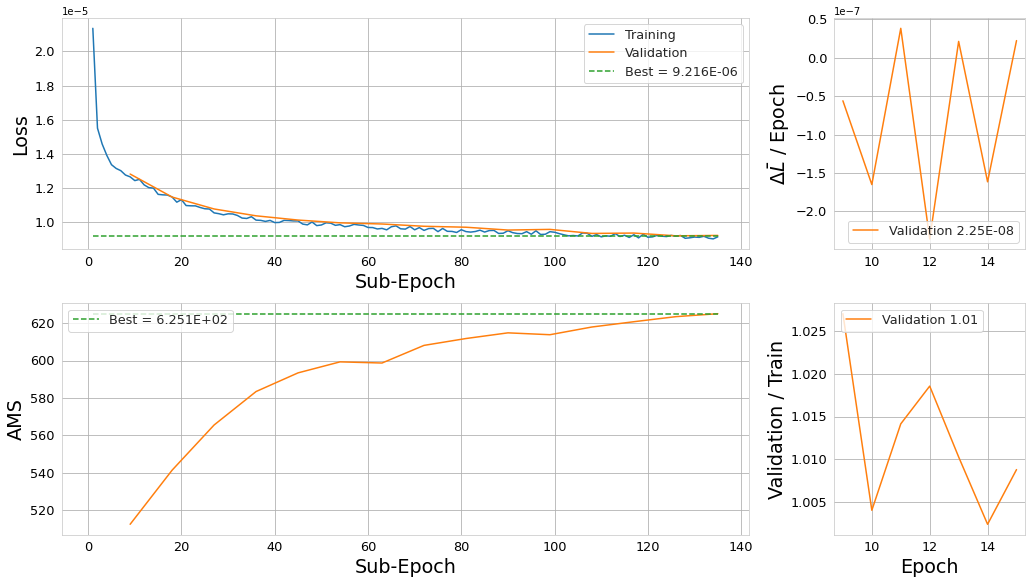

Loading best model with metric value 9.216E-06
Model took 244.611s

Scores are: {'loss': 9.215686077368446e-06, 'AMS': 623.4826970305705}
Training model 4 / 10, Valid Index = 3, Train indices= [0, 1, 2, 4, 5, 6, 7, 8, 9]


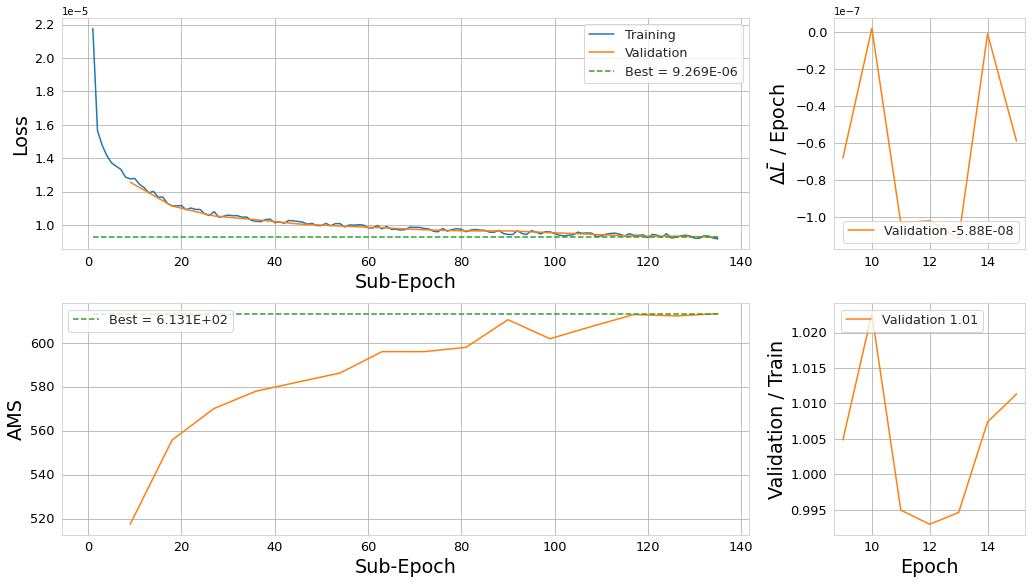

Loading best model with metric value 9.269E-06
Model took 247.144s

Scores are: {'loss': 9.268831490771845e-06, 'AMS': 613.1369175351007}
Training model 5 / 10, Valid Index = 4, Train indices= [0, 1, 2, 3, 5, 6, 7, 8, 9]


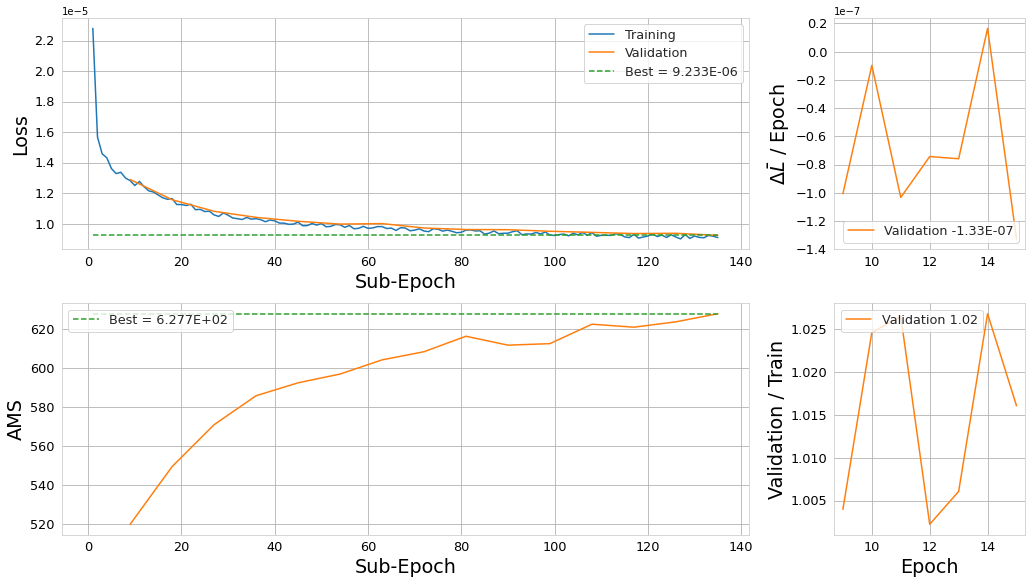

Loading best model with metric value 9.233E-06
Model took 245.902s

Scores are: {'loss': 9.232568118022755e-06, 'AMS': 627.7110353810629}
Training model 6 / 10, Valid Index = 5, Train indices= [0, 1, 2, 3, 4, 6, 7, 8, 9]


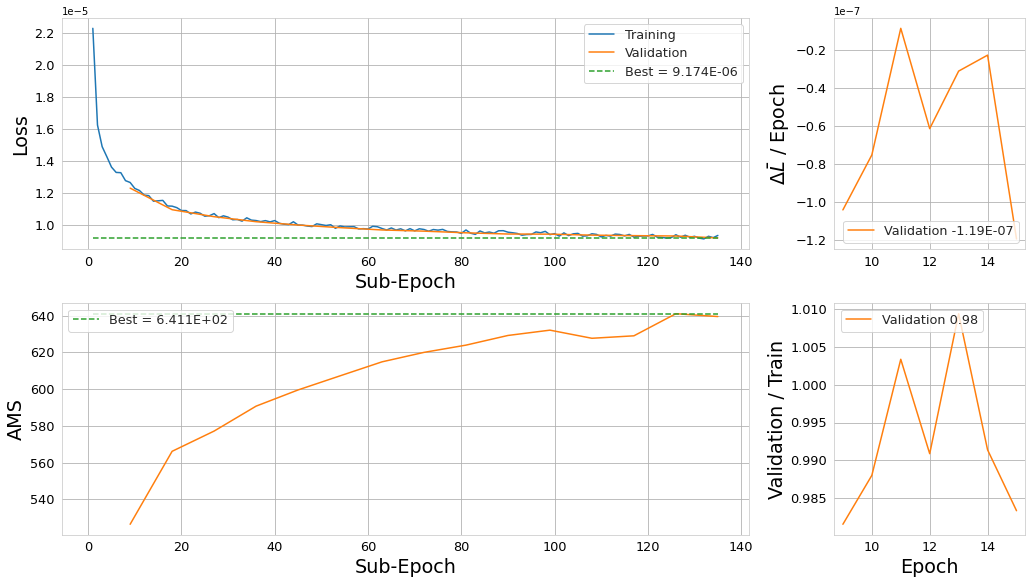

Loading best model with metric value 9.174E-06
Model took 245.678s

Scores are: {'loss': 9.173993021249771e-06, 'AMS': 639.5310312048452}
Training model 7 / 10, Valid Index = 6, Train indices= [0, 1, 2, 3, 4, 5, 7, 8, 9]


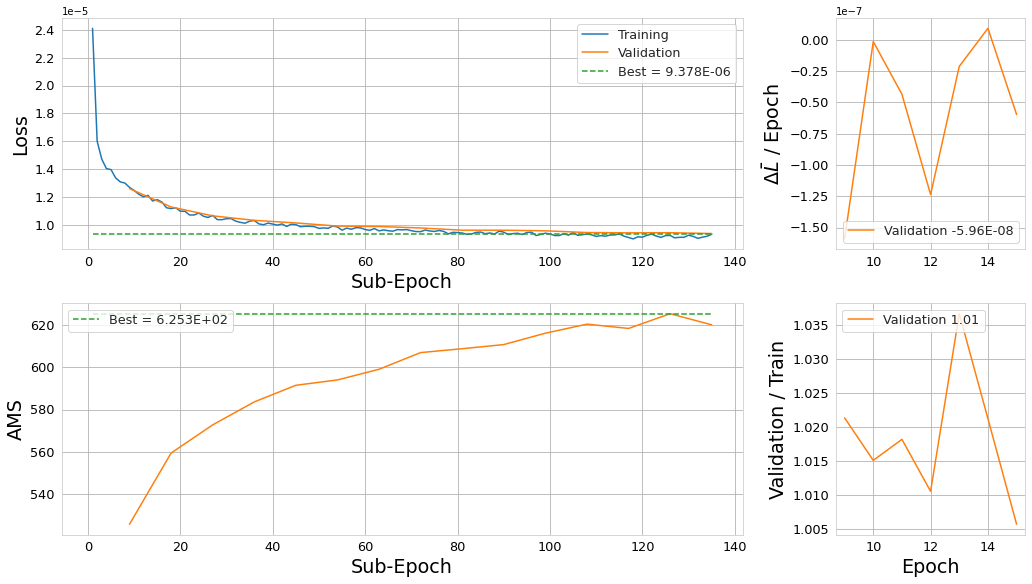

Loading best model with metric value 9.378E-06
Model took 2285.845s

Scores are: {'loss': 9.377652531838976e-06, 'AMS': 620.0055473735187}
Training model 8 / 10, Valid Index = 7, Train indices= [0, 1, 2, 3, 4, 5, 6, 8, 9]


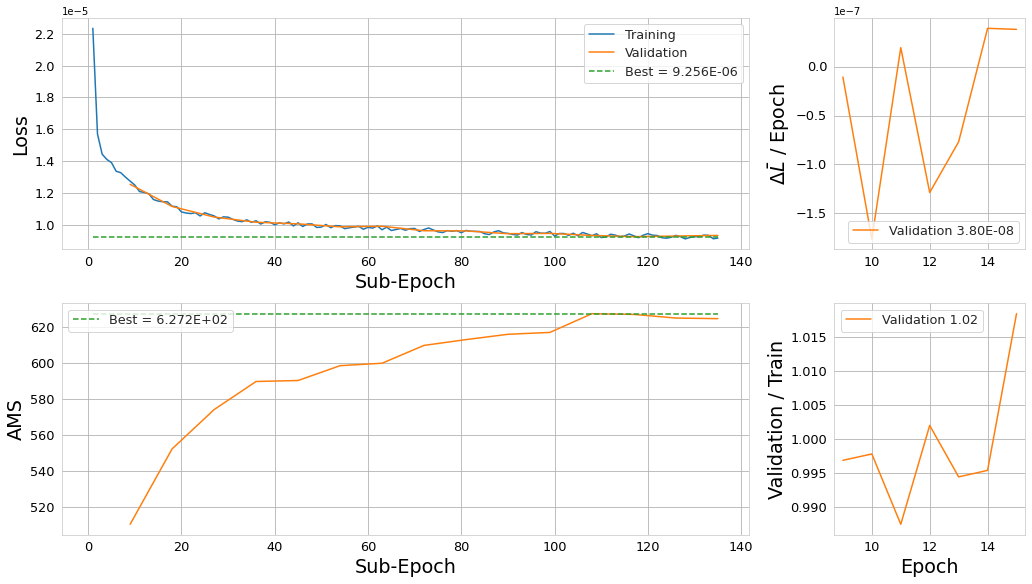

Loading best model with metric value 9.256E-06
Model took 75.843s

Scores are: {'loss': 9.256198609364219e-06, 'AMS': 626.8097461323432}
Training model 9 / 10, Valid Index = 8, Train indices= [0, 1, 2, 3, 4, 5, 6, 7, 9]


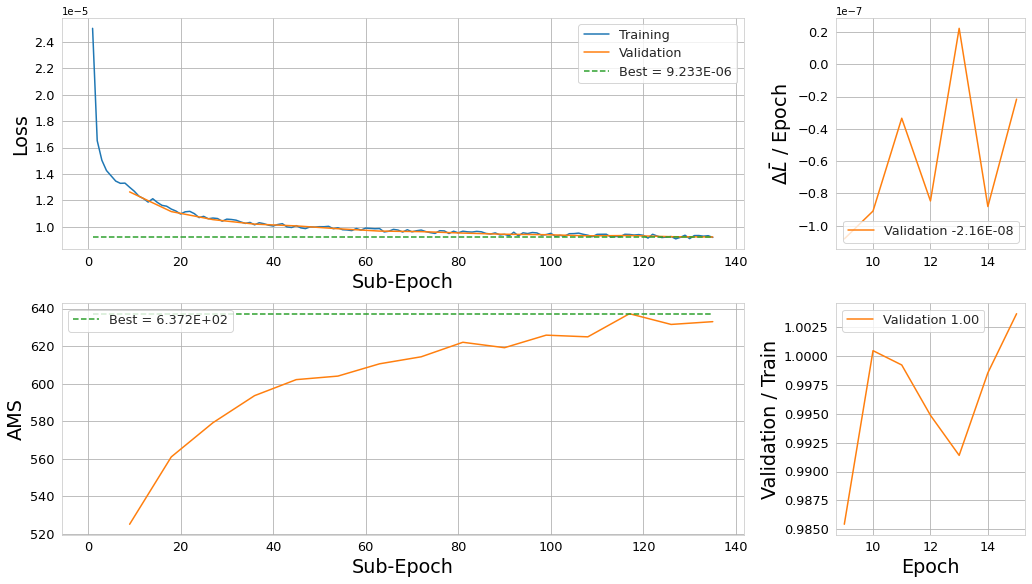

Loading best model with metric value 9.233E-06
Model took 83.552s

Scores are: {'loss': 9.233121090801433e-06, 'AMS': 632.9982448410498}
Training model 10 / 10, Valid Index = 9, Train indices= [0, 1, 2, 3, 4, 5, 6, 7, 8]


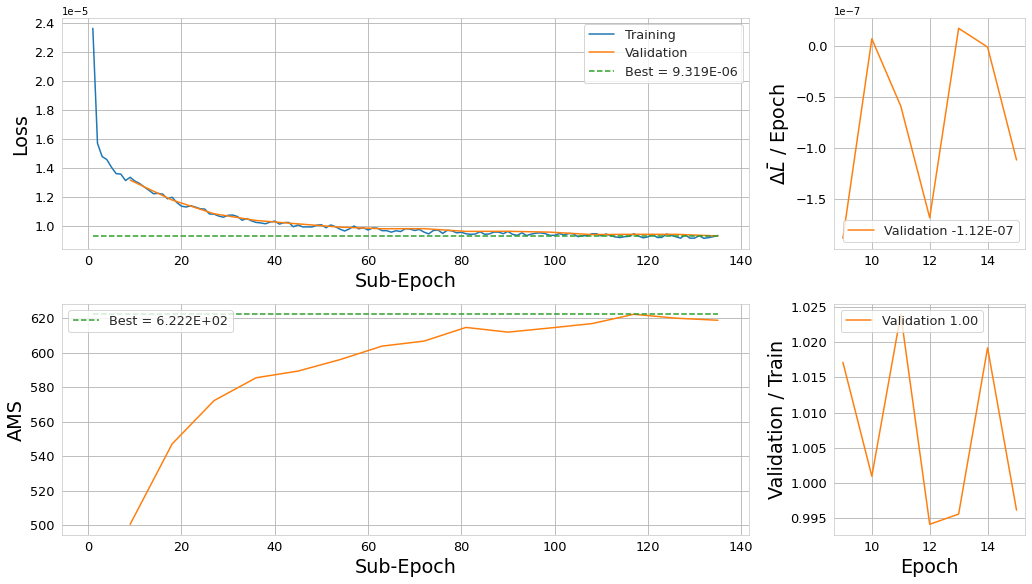

Loading best model with metric value 9.319E-06
Model took 82.654s

Scores are: {'loss': 9.318771844846196e-06, 'AMS': 618.7303401394037}

______________________________________
Training finished
Cross-validation took 4010.583s 


<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

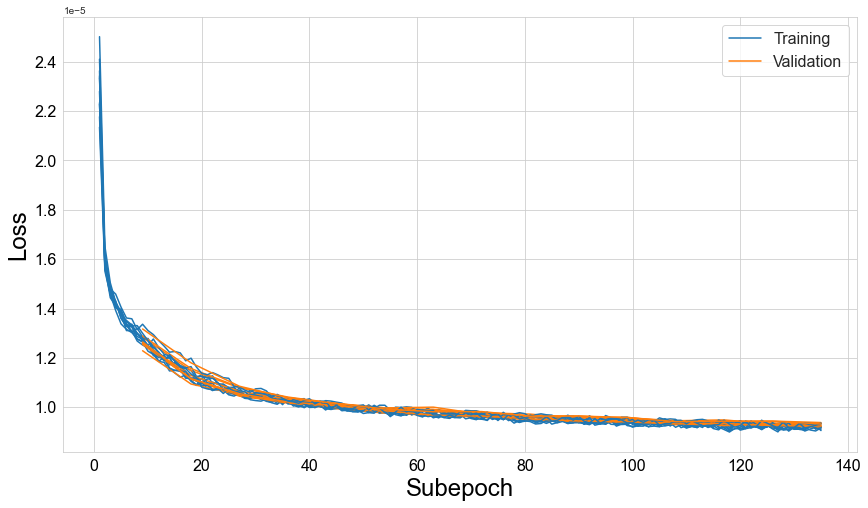

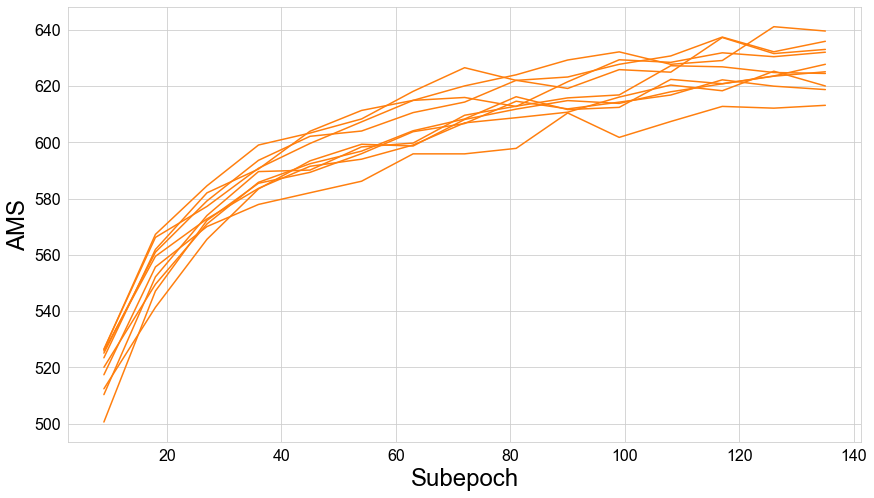

Mean loss = 9.26e-06±2e-08
Mean AMS = 627±2
______________________________________



In [11]:
# results, histories, cycle_losses = fold_train_ensemble(train_fy, n_models,live_fdbk_first_only=False,
#                                                       model_builder=model_builder,
#                                                       bs=bs,
#                                                       callback_partials=callback_partials,
#                                                       eval_metrics=eval_metrics,
#                                                       max_epochs=max_epochs, patience=patience, 
#                                                       savepath=Path('train_weights_0'))

from lumin.nn.training.train import train_models

results, histories, cycle_losses = train_models(train_fy,  # Training data
                                                n_models,  # Number of models to train
                                                model_builder=model_builder,  # How to build models, losses, and optimisers
                                                bs=bs,  # Batch size
                                                cb_partials=cb_partials,  # List of uninitialised callbacks
                                                metric_partials=metric_partials,  # Pass our evaluation metrics
                                                n_epochs=n_epochs,  # Maximum number of epochs to train
                                                patience=patience) # If not None, stop training if validation loss doesn't improve after set number of cycles (automatic save best) 

## Ensemble loading
We can now build an ensemble from the trained models, however rather than simply treating them all equally, we can weight them according to some metric (e.g. AMS, reciprocal of loss).

In [12]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [13]:
# ensemble = Ensemble.from_results(results, n_models, model_builder, metric='loss', location=Path('train_weights_0'))
ensemble = Ensemble.from_results(results, n_models, model_builder, metric='loss')
ensemble.add_input_pipe(train_fy.input_pipe)

Choosing ensemble by loss


Model 0 is 5 with loss = 9.173993021249771e-06
Model 1 is 0 with loss = 9.211663382302504e-06
Model 2 is 2 with loss = 9.215686077368446e-06
Model 3 is 4 with loss = 9.232568118022755e-06
Model 4 is 8 with loss = 9.233121090801433e-06
Model 5 is 7 with loss = 9.256198609364219e-06
Model 6 is 3 with loss = 9.268831490771845e-06
Model 7 is 1 with loss = 9.313328519056085e-06
Model 8 is 9 with loss = 9.318771844846196e-06
Model 9 is 6 with loss = 9.377652531838976e-06


In [14]:
name = f'weights/selected_set_0_{run_name}'

In [15]:
ensemble.save(name, feats=train_fy.cont_feats+train_fy.cat_feats, overwrite=True)

# Interpretation

Top ten most important features:
              Feature  Importance  Uncertainty
0           res_mass    2.225339     0.048074
1     Zlep_cand_mass    0.627115     0.021437
2  HiggsZZ_cand_mass    0.544347     0.019132
3       Zlep_cand_pt    0.460725     0.015453
4     leading_Hbb_pt    0.422826     0.013609
5            dR_l1b1    0.324985     0.011948
6    trailing_Hbb_pt    0.297092     0.010432
7  Higgsbb_cand_mass    0.211926     0.008891
8            dR_l1b2    0.179055     0.008856
9     Zjet_cand_mass    0.178804     0.007226


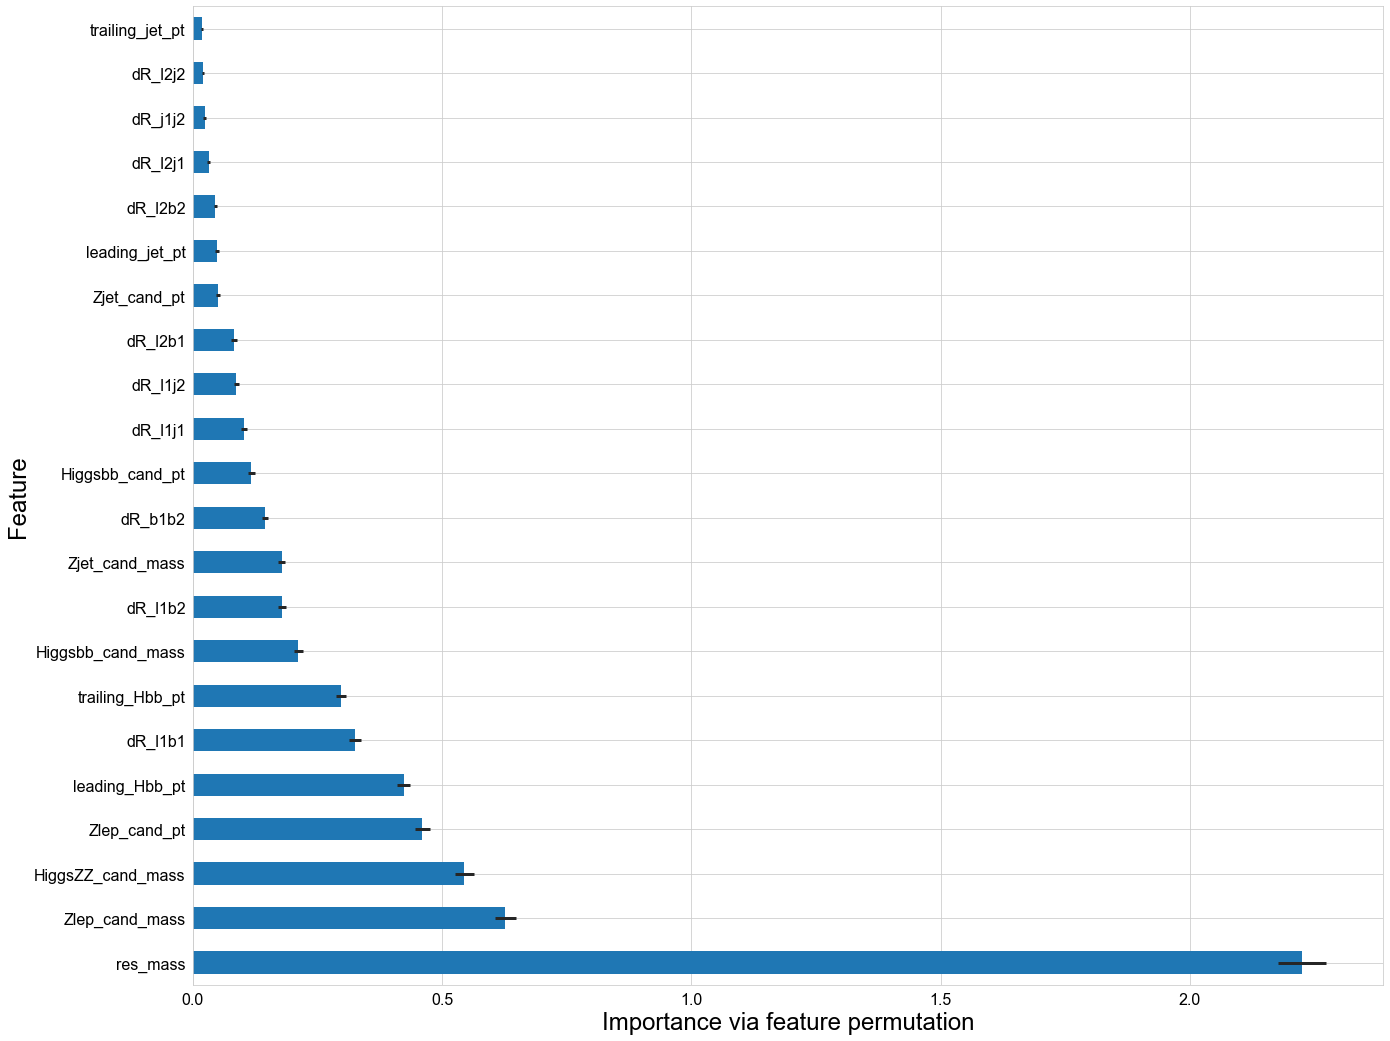

In [16]:
_ = ensemble.get_feat_importance(train_fy)

In [17]:
ensemble[0][1].head.plot_embeds()

In [18]:
m = ensemble[0][1]

In [19]:
train_df = train_fy.get_df(inc_inputs=True, nan_to_num=True)

591031 datapoints loaded


In [20]:
def preprocess_mass(m):
    idx = train_fy.cont_feats.index('res_mass')
    m -= train_fy.input_pipe[0].mean_[idx]
    m /= train_fy.input_pipe[0].scale_[idx]
    return m

In [21]:
masses = train_df.res_mass.unique()

In [22]:
masses

array([-1.2771672 , -1.0937262 , -0.63512313, -0.17652006,  0.28208295,
        0.9699874 ,  1.657892  ], dtype=float32)

In [23]:
train_feats = train_fy.cont_feats+train_fy.cat_feats

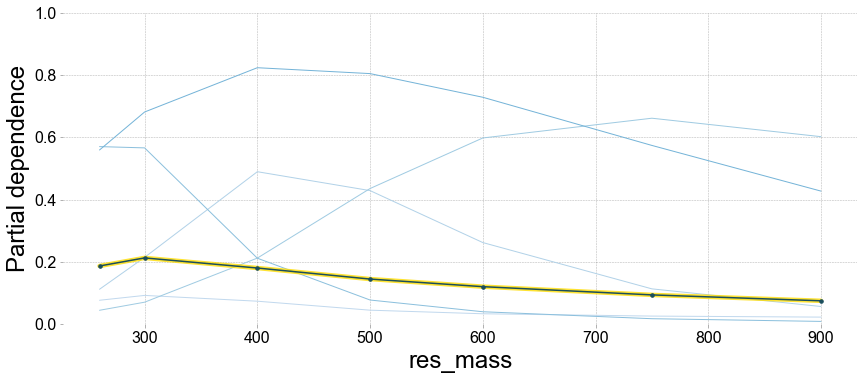

In [24]:
plot_1d_partial_dependence(m, train_df[train_df.gen_target==0], 'res_mass', train_feats=train_feats, y_lim=[0,1],
                           input_pipe=train_fy.input_pipe, wgt_name='gen_weight', sample_sz=int(len(train_df[train_df.gen_target==0])/2),
                           pdp_isolate_kargs={'cust_grid_points':masses}, n_clusters=5)

In [25]:
def lookup_mass(m):
    idx = train_feats.index('res_mass')
    m *= train_fy.input_pipe[0].scale_[idx]
    m += train_fy.input_pipe[0].mean_[idx]
    return int(round(m))

Mass 260, N events 8716, weight_sum 0.9999998807907104


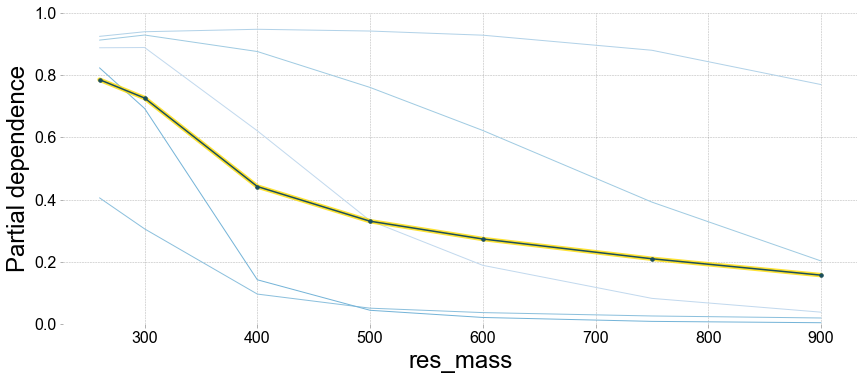

Mass 300, N events 10928, weight_sum 0.9999998807907104


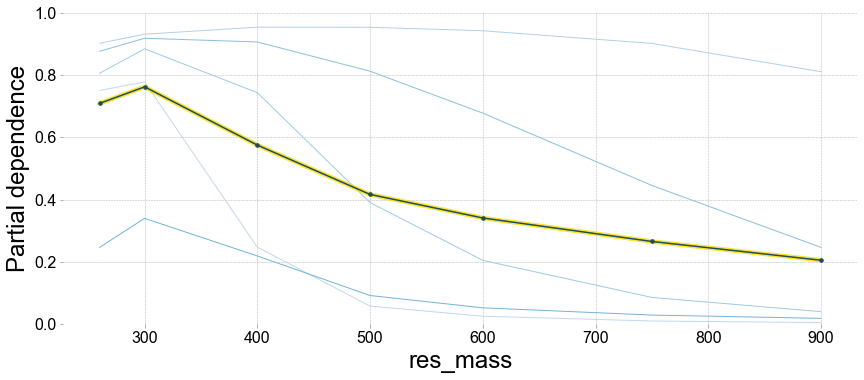

Mass 400, N events 14753, weight_sum 0.9999999403953552


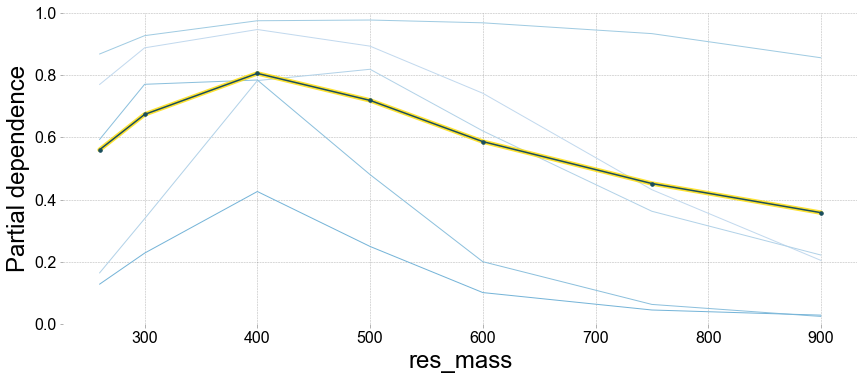

Mass 500, N events 16720, weight_sum 0.9999999403953552


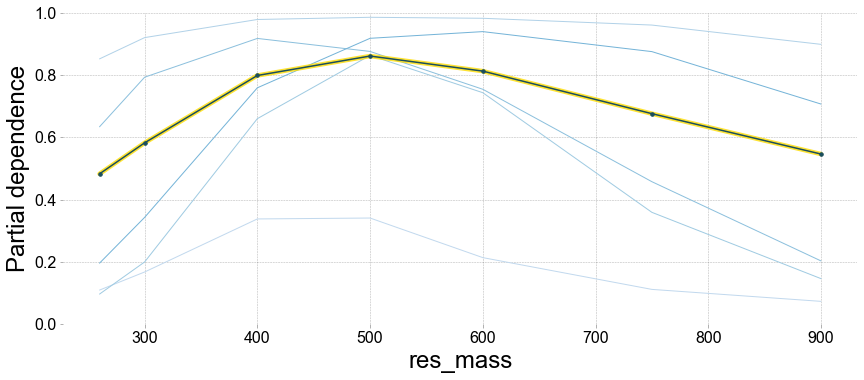

Mass 600, N events 17827, weight_sum 0.9999998807907104


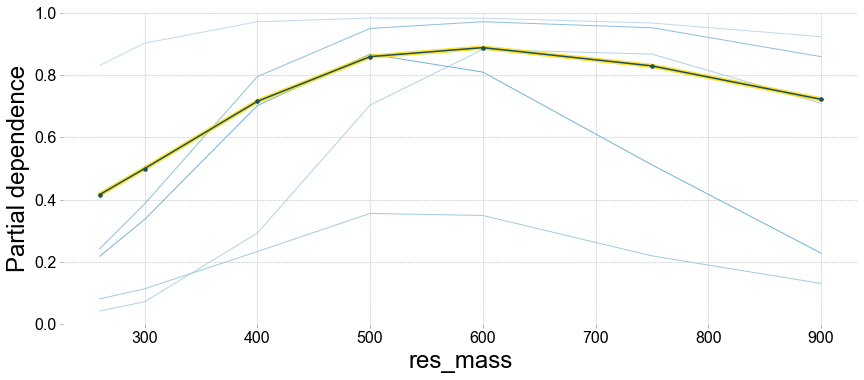

Mass 750, N events 18404, weight_sum 1.0000001192092896


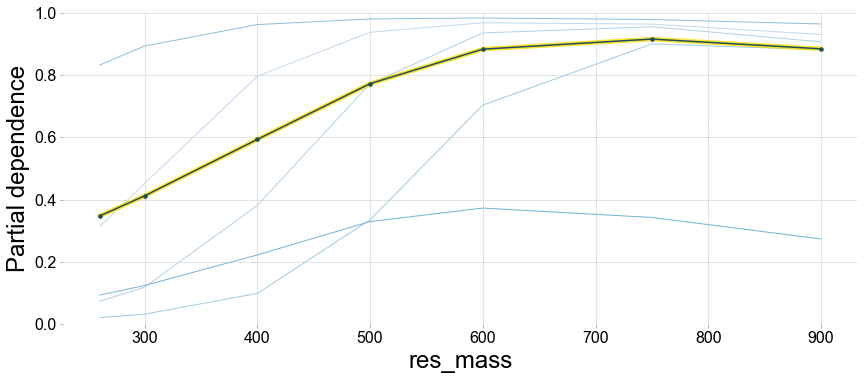

Mass 900, N events 18207, weight_sum 1.0


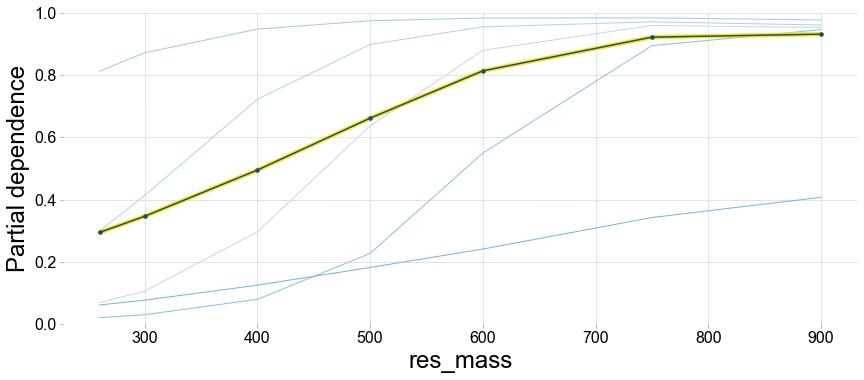

In [26]:
for mass in sorted(train_df.res_mass.unique()):
    df = train_df[(train_df.gen_target==1)&(train_df.res_mass==mass)]
    print(f'Mass {lookup_mass(mass)}, N events {len(df)}, weight_sum {df.gen_weight.sum()}')
    plot_1d_partial_dependence(m, df, 'res_mass', train_feats=train_feats, n_clusters=5, y_lim=[0,1],
                               input_pipe=train_fy.input_pipe, wgt_name='gen_weight',
                               pdp_isolate_kargs={'cust_grid_points':masses})